In [30]:
import tensorflow


In [7]:
import keras, datetime
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
from keras.applications import mobilenet_v3
import numpy as np

In [8]:
# import zipfile
# with zipfile.ZipFile('/content/drive/MyDrive/cats/new_cats.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content/drive/MyDrive/cats/')

In [22]:
X_train = []
y_train = []
for i in range(6):
  cur_ds = np.load('/content/drive/MyDrive/cats/CAT_0'+str(i)+'.npy', allow_pickle=True)
  X_train.append(cur_ds.item().get('img'))
  y_train.append(cur_ds.item().get('marks'))
X_train = np.concatenate(X_train, axis=0)
y_train = np.concatenate(y_train, axis=0)
test_ds = np.load('/content/drive/MyDrive/cats/CAT_06.npy', allow_pickle=True)
X_test = np.array(test_ds.item().get('img'))
y_test = np.array(test_ds.item().get('marks'))

In [23]:
# X_train = X_train.astype('float32') / 255.
# X_test = X_test.astype('float32') / 255.
y_train = np.reshape(y_train, (-1, 18))
y_test = np.reshape(y_test, (-1, 18))

In [24]:
inputs = Input(shape=(224, 224, 3))

In [34]:
start_time = datetime.datetime.now().strftime('%Y_%m_%d_%H_%M_%S')

In [ ]:
net = mobilenet_v3.MobileNetV3Large(input_shape=(224, 224, 3), include_top=False, weights='imagenet', input_tensor=inputs, pooling='max')
net = Dense(128, activation='relu')(net.layers[-1].output)
net = Dense(64, activation='relu')(net)
net = Dense(18, activation='linear')(net)
model = Model(inputs=inputs, outputs=net)
model.summary()

In [31]:
model.compile(optimizer=tensorflow.keras.optimizers.Adam(), loss='mse')

In [36]:
model.fit(X_train, y_train, epochs=50, batch_size=32, shuffle=True,
  validation_data=(X_test, y_test), verbose=1,
  callbacks=[
    TensorBoard(log_dir='train_data/logs/%s' % (start_time)),
    ModelCheckpoint('train_data/models/%s.h5' % (start_time), monitor='val_loss', verbose=1, save_best_only=True, mode='auto'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, mode='auto')
  ]
)

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/50
270/270 [==============================] - 88s 325ms/step - loss: 17.8588 - val_loss: 105.1966

Epoch 00001: val_loss improved from inf to 105.19659, saving model to train_data/models/2021_09_26_15_56_31.h5
Epoch 2/50
270/270 [==============================] - 85s 315ms/step - loss: 15.0675 - val_loss: 432.2980

Epoch 00002: val_loss did not improve from 105.19659
Epoch 3/50
270/270 [==============================] - 85s 315ms/step - loss: 18.5969 - val_loss: 184.1396

Epoch 00003: val_loss did not improve from 105.19659
Epoch 4/50
270/270 [==============================] - 87s 324ms/step - loss: 15.4053 - val_loss: 476.6650

Epoch 00004: val_loss did not improve from 105.19659
Epoch 5/50
270/270 [==============================] - 87s 324ms/step - loss: 103.9696 - val_loss: 545447744.0000

Epoch 00005: val_loss did not improve from 105.19659
Epoch 6/50
270/270 [==============================] - 88s 326ms/step - loss: 40.5477 - val_loss: 4432.8315

Epoch 00006: val_loss did n

In [37]:
from google.colab.patches import cv2_imshow
# cv2_imshow(img)

In [38]:
import cv2

In [39]:
img = cv2.imread('/content/test.png')

In [42]:
out = model(img[np.newaxis, ...])

In [43]:
out

<tf.Tensor: shape=(1, 18), dtype=float32, numpy=
array([[ 80.40458 , 107.440475, 101.20886 , 104.77366 ,  94.06032 ,
        123.7131  ,  62.24905 ,  97.2303  ,  61.070168,  71.222855,
         78.7208  ,  85.07882 ,  94.986305,  83.447586, 108.705414,
         65.53241 , 111.70599 ,  91.91568 ]], dtype=float32)>

In [52]:
def draw_marks(img, points):
    for i in range(len(points)):
        p = points[i]
        p = (int(p[0]), int(p[1]))
        img = cv2.circle(img, p, 1, (255, 0, 0), 1)

    return img


In [47]:
out.numpy().reshape(-1, 2)

array([[ 80.40458 , 107.440475],
       [101.20886 , 104.77366 ],
       [ 94.06032 , 123.7131  ],
       [ 62.24905 ,  97.2303  ],
       [ 61.070168,  71.222855],
       [ 78.7208  ,  85.07882 ],
       [ 94.986305,  83.447586],
       [108.705414,  65.53241 ],
       [111.70599 ,  91.91568 ]], dtype=float32)

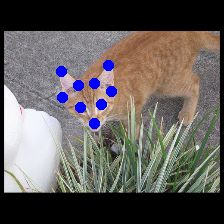

In [53]:
cv2_imshow(draw_marks(img, out.numpy().reshape(-1, 2)))